# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

In [1]:
from IPython.core.debugger import Tracer

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [39]:
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [40]:
def max_element(arr):
    zeros = np.where(arr == 0)[0]
    if (len(zeros) == 0):
        return None
    if (zeros[-1] == len(arr) - 1):
        return None
    else:
        #last element check
        if zeros[-1] == (len(arr) - 1):
            after_zeros = np.delete(zeros , -1)
        else:
            after_zeros = zeros
        return arr[after_zeros + 1].max()

In [41]:
max_element(a)

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [407]:
def nearest_value(X, v):
    Y = X.ravel()
    return Y[(np.abs(X-v)).argmin()]

In [405]:
X = np.arange(0,10).reshape((2, 5))
X

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [406]:
v = 8.6
v

8.6

In [408]:
nearest_value(X, v)

9

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [409]:
B = np.random.rand(3,2)

In [411]:
def scale(X):
    if X.std() != 0:
        return (X - X.mean()) / X.std()
    else:
        return 'division by 0'

In [412]:
scale(B)

array([[ 0.49608837, -0.84494132],
       [-0.93017581,  1.55697089],
       [-1.06416272,  0.78622058]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [413]:
C = np.random.randn(5,5) + 10

In [418]:
def get_stats(X):
    if X.shape[0] == X.shape[1]:
        det = np.linalg.det(X)
        eig_vals, eig_vects = np.linalg.eig(X)
        invX = np.linalg.inv(X)
    else:
        det = 'determinant can not be found'
        eig_vals = 'eigenvalues can not be found'
        invX = 'inverse matrix can not be found'
    trace = np.trace(X)
    Xmax = X.max()
    Xmin = X.min()
    norm = np.linalg.norm(X)
    
    return det, trace, Xmax, Xmin , norm, eig_vals, invX

In [419]:
get_stats(C)

(-634.16674874807131,
 46.511054052820185,
 12.303730232666883,
 8.2220162957671867,
 50.297889708301021,
 array([ 49.95893934+0.j       ,   1.66509306+0.j       ,
         -2.60612282+0.j       ,  -1.25342776+1.1636699j,
         -1.25342776-1.1636699j]),
 array([[ 0.33291069, -1.02843316,  0.66091462,  0.47598299, -0.50378377],
        [-0.0775962 , -0.1711834 ,  0.2172461 , -0.03619208,  0.08086917],
        [-0.14770644,  0.14417015, -0.3005763 ,  0.11130504,  0.22380196],
        [ 0.09809222,  0.5302223 , -0.47079576, -0.41911978,  0.30282221],
        [-0.21405882,  0.63822343, -0.12953286, -0.14711957, -0.06214295]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [420]:
Xmax = []
for exp_num in range(100):
    a = np.random.normal(0, 1, (10,10))
    b = np.random.normal(0, 1, (10,10))
    Xmax.append((a * b).max())
max_array = np.asarray(Xmax)
max_array.mean()

3.555405575521529

In [421]:
np.percentile(max_array, 95)

5.3762028073291734

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
import pandas as pd
flight_data = pd.read_csv('2008.csv')
flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns', 638)
pd.set_option('display.show_dimensions', True)

Проверка на наличие нулевых значений:

In [4]:
flight_data.isnull().values.ravel().any(axis=0)

True

Нахождение их количества:

In [5]:
flight_data.isnull().values.ravel().sum()

355215

Столько всего объектов с пропусками:

In [6]:
flight_data.isnull().any(axis=1).sum(axis=0)

70000

Столько всего признаков с хотя бы одним пропущенным значением:

In [7]:
flight_data.isnull().any(axis=0).sum(axis=0)

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Имеются ли пропущенные значения в целевой переменой?

In [8]:
flight_data[flight_data['DepDelay'].isnull()]['DepDelay'].isnull().any(axis = 0)

True

Да, имеются.

Сколько их всего:

In [9]:
flight_data[flight_data['DepDelay'].isnull()]['DepDelay'].isnull().sum()

1399

Столько всего нулевых значений целевой переменной:

In [10]:
flight_data[flight_data['DepDelay'] == 0].shape[0]

5197

In [11]:
flight_data[(flight_data['DepDelay'].isnull() == True)][['DepDelay', 'DepTime', 'ArrTime', 
                                               'ActualElapsedTime', 'AirTime', 'ArrDelay', 
                                               'TaxiIn', 'TaxiOut', 'CarrierDelay', 
                                               'WeatherDelay', 'NASDelay', 
                                               'SecurityDelay', 'LateAircraftDelay']].isnull().sum(axis = 0)

DepDelay             1399
DepTime              1399
ArrTime              1399
ActualElapsedTime    1399
AirTime              1399
ArrDelay             1399
TaxiIn               1399
TaxiOut              1399
CarrierDelay         1399
WeatherDelay         1399
NASDelay             1399
SecurityDelay        1399
LateAircraftDelay    1399
Length: 13, dtype: int64

Получается, что там где отсутствуют значения целевой переменной отсутствуют еще и значения DepTime, ArrTime, ActualElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay. Однако, все эти признаки вещественные.

Проверим еще признаки Diverted и Cancelled для тех наблюдений, у которых отсутствуют значения целевой переменной:

In [12]:
flight_data[(flight_data['Cancelled'] == 1)].shape[0]

1411

In [13]:
flight_data[(flight_data['Diverted'] == 0)].shape[0]

69829

In [14]:
flight_data[(flight_data['Diverted'] == 0)
            & (flight_data['Cancelled'] == 1)
            & (flight_data['DepDelay'].isnull() == True)].shape[0]

1399

Выходит, что у всех наблюдений без значения целевой переменной Diverted = 1, а Cancelled = 0.

### Промежуточный вывод по заданию
Можно удалить принак Cancelled, так как вне наблюдений с отсутствующей целевой переменной только у 12 значений он принимает 1, а во всех остальных случаях - 0. Посколько можно удалить Cancelled, то можно удалить и CancellationCode, так как этот признак указывает причину отмены рейса.

Теперь чистим данные по заданию.

In [15]:
new_flight_data = flight_data[(flight_data['DepDelay'].isnull() == False)
                            & (flight_data['DepDelay'] != 0)]

In [16]:
new_flight_data.shape[0]

63404

In [17]:
new_flight_data.drop(['CancellationCode', 'Cancelled'], axis=1, inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
new_flight_data.drop(['Diverted'], axis=1, inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
new_flight_data.drop(['CarrierDelay', 'WeatherDelay',
                      'NASDelay', 'SecurityDelay',
                      'LateAircraftDelay'], axis=1, inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Выделяем целвеую переменную в отдельный вектор и убираем ее из данных:

In [20]:
y = new_flight_data['DepDelay']
new_flight_data.drop(['DepDelay'], axis = 1, inplace = True)
y.head()

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    16.0
1    16.0
2    -2.0
3    -3.0
4    -5.0
Name: DepDelay, Length: 5, dtype: float64

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [21]:
new_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0


Напишем для этого функцию:

In [22]:
def time_separation(df, colname):
    n = df.columns.get_loc(colname)
    colname_hours = df[colname]//100
    colname_minutes = df[colname]%100
    df.insert(loc = n, column = colname + '_Hour', value = colname_hours)
    df.insert(loc = n + 1, column = colname + '_Minute', value = colname_minutes)
    df.drop(colname, axis=1, inplace=True)
    return df

In [23]:
time_separation(new_flight_data, 'DepTime')
time_separation(new_flight_data, 'CRSDepTime')
time_separation(new_flight_data, 'ArrTime')
time_separation(new_flight_data, 'CRSArrTime').head()

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Year,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,2008,6,18,3,21.0,11.0,20,55,23.0,8.0,23,0,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0
1,2008,6,4,3,14.0,26.0,14,10,17.0,30.0,17,28,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0
2,2008,8,3,7,11.0,43.0,11,45,15.0,1.0,15,20,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0
3,2008,1,23,3,11.0,41.0,11,44,13.0,23.0,13,35,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0
4,2008,5,4,7,8.0,15.0,8,20,12.0,43.0,13,0,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Сильно коррелировал Cancelled, он уже исключен. DepDelay - это линейная комбинация CRSDepTime и DepTime. По-хорошему, DepTime нужно дропнуть, потому что он по смыслу не может быть входной переменной в модели, поскольку мы не знаем когда точно улетит самолет до его фактического отлета. По той же логике следует действовать и с признаками содержашими информацию об отлете: нужно убрать CRSArrTime и ArrDelay. Также следует избавиться от CRSElapsedTime, потому что мы не можем знать это значение до того, как полет состоится. ActualElapsedTime - линейная комбинация AirTime, TaxiIn, TaxiOut, поэтому от него тоже лучше избавиться.

In [24]:
new_flight_data.drop(['TailNum', 'Year'], axis=1, inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
new_flight_data.drop(['ArrTime_Hour', 'ArrTime_Minute', 'ArrDelay',
                      'DepTime_Hour', 'DepTime_Minute'], axis=1, inplace=True)
new_flight_data.drop(['ActualElapsedTime'], axis=1, inplace=True)
new_flight_data.drop(['CRSElapsedTime'], axis=1, inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing t

Уберем также 'FlightNum' и 'UniqueCarrier', потому что не понятно, как такие признаки могут влиять на задержку отправления самолета.

In [26]:
new_flight_data.drop(['UniqueCarrier'], axis=1,inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_flight_data.drop(['FlightNum'], axis=1,inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Маловероятно, что минуты повлияют на результат, поэтому от них тоже можно избавиться:

In [28]:
new_flight_data.drop(['CRSDepTime_Minute', 'CRSArrTime_Minute'], axis=1,inplace=True)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
new_flight_data.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime_Hour,CRSArrTime_Hour,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut
0,6,18,3,20,23,46.0,MDW,CLE,307,3.0,8.0
1,6,4,3,14,17,108.0,IAH,AVL,834,4.0,12.0
2,8,3,7,11,15,125.0,MDW,TPA,997,4.0,9.0
3,1,23,3,11,13,79.0,SLC,FCA,532,4.0,19.0
4,5,4,7,8,13,136.0,LAS,AUS,1090,4.0,8.0


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

Нужно вернуть признак для построения гистограммы:

In [30]:
time_separation(flight_data, 'DepTime').head()

,Year,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,21.0,11.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,14.0,26.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,11.0,43.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,11.0,41.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,8.0,15.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


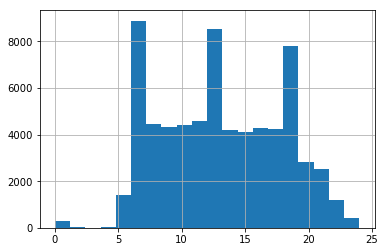

In [31]:
flight_data['DepTime_Hour'].hist(bins=20)

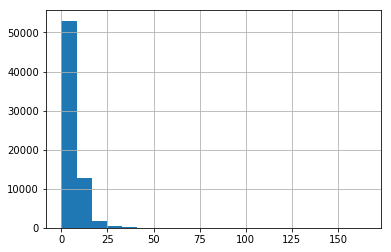

In [32]:
flight_data['TaxiIn'].hist(bins=20)

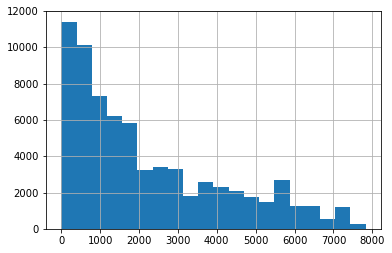

In [33]:
flight_data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

На всех графиках видно, что есть большой разброс в величине значений. Поскольку при составлении регресии считается расстояние до прямой, объекты с большим значением у определенный признаков будут сильнее влиять на положение прямой регрессии. К тому же мы говорим о признаках, которые имеют различные измерения, поэтому следует применить масштабирование, чтобы мы могли работать с объектами не в абсолютных величинах, а в относительных.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

scaler = StandardScaler()
onehot = DictVectorizer(sparse=False)

In [35]:
def transform_data(new_flight_data):

    #вещественные    
#    num_data = new_flight_data[[ 'DepTime_Hour', 'DepTime_Minute',
#       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
#       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute', 
#       'ActualElapsedTime', 'CRSElapsedTime',
#       'AirTime', 'ArrDelay', 'Distance', 'TaxiIn',
#       'TaxiOut', 
#       'CarrierDelay', 'WeatherDelay', 'NASDelay',
#       'SecurityDelay', 'LateAircraftDelay']]


    
    num_data = new_flight_data[['CRSDepTime_Hour',
                                'CRSArrTime_Hour',
                                'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]
    
    num_data = num_data.fillna(value = 0.0)

    #категориальные
    cat_data = new_flight_data[['Month', 'DayofMonth',
                                'DayOfWeek', 'Origin', 'Dest']]
    
    cat_data = cat_data.fillna('nan')
    
    #стандартизация вещественных
    
    scaler.fit(num_data)
    std_num_data = scaler.transform(num_data)
    
    #one-hot
    
    one_hot_data = pd.get_dummies(cat_data)
    
    return np.concatenate((std_num_data, one_hot_data), axis=1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [36]:
transformed_data = pd.DataFrame(transform_data(new_flight_data))

In [37]:
transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602
0,1.512432,1.725956,-0.849307,-0.744130,-0.786908,-0.741204,6.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [38]:
transformed_data.shape

(63404, 603)

In [39]:
(transformed_data.iloc[:,100] != 0).sum()

36

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [40]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, train_size=0.7)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
X_train.shape

(44382, 603)

In [42]:
len(X_train)

44382

In [43]:
len(X_test)

19022

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [44]:
import sklearn

In [45]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

X_ktrain, X_remainder, y_ktrain, y_remainder = train_test_split(X_train, y_train, train_size=1000)

In [46]:
X_ktrain.shape

(1000, 603)

In [47]:
reg.fit (X_ktrain, y_ktrain)

reg_coef = reg.coef_

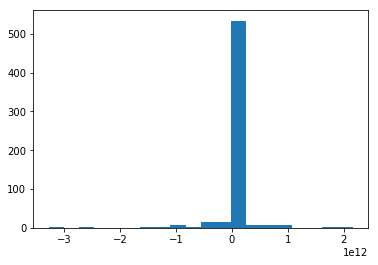

In [48]:
plt.hist(reg_coef, bins=20);

Дисперсия для тренировочной из 1к объектов и для тестовой:

In [49]:
sklearn.metrics.mean_squared_error(y_pred=reg.predict(X_ktrain), y_true=y_ktrain)

605.17565419131142

In [50]:
sklearn.metrics.mean_squared_error(y_pred=reg.predict(X_test), y_true=y_test)

1.8243560616827661e+22

R^2 для тренировочной из 1к объектов и для тестовой:

In [51]:
reg.score(X_ktrain, y_ktrain)

0.34583523881926681

In [52]:
reg.score(X_test, y_test)

-1.4141290580018166e+19

В модели есть очень большие и очень маленькие коэффициенты. На тестовой выборке очень высокая дисперсия.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

folds = KFold(n_splits=5, shuffle=True)

parameters = {'alpha': np.linspace(0.1,200,30)}
lasso = Lasso()

alphaopt_l1 = GridSearchCV(lasso, param_grid = parameters, cv = folds, scoring='r2')
alphaopt_l1.fit(X_ktrain, y_ktrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-01,   6.99310e+00,   1.38862e+01,   2.07793e+01,
         2.76724e+01,   3.45655e+01,   4.14586e+01,   4.83517e+01,
         5.52448e+01,   6.21379e+01,   6.90310e+01,   7.59241e+01,
         8.28172e+01,   8.97103e+01,   9.66034e+01,   1.03497e+02,
         1....    1.65534e+02,   1.72428e+02,   1.79321e+02,   1.86214e+02,
         1.93107e+02,   2.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [54]:
gridopt1 = pd.DataFrame(alphaopt_l1.cv_results_)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users

In [55]:
alphaopt_l1.best_estimator_

Lasso(alpha=6.9931034482758623, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
best_l1 = Lasso(alpha=6.9931034482758623, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
best_l1.fit(X_ktrain, y_ktrain)

Lasso(alpha=6.993103448275862, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
best_l1_coef = best_l1.coef_

In [59]:
from sklearn.linear_model import Ridge

folds = KFold(n_splits=5, shuffle=True)

parameters = {'alpha': np.linspace(0.1,200,30)}
ridge = Ridge()

alphaopt_l2 = GridSearchCV(ridge, param_grid = parameters, cv = folds, scoring='r2')
alphaopt_l2.fit(X_ktrain, y_ktrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-01,   6.99310e+00,   1.38862e+01,   2.07793e+01,
         2.76724e+01,   3.45655e+01,   4.14586e+01,   4.83517e+01,
         5.52448e+01,   6.21379e+01,   6.90310e+01,   7.59241e+01,
         8.28172e+01,   8.97103e+01,   9.66034e+01,   1.03497e+02,
         1....    1.65534e+02,   1.72428e+02,   1.79321e+02,   1.86214e+02,
         1.93107e+02,   2.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [60]:
best_l1.fit(X_ktrain, y_ktrain)

Lasso(alpha=6.993103448275862, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
gridopt2 = pd.DataFrame(alphaopt_l2.cv_results_)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users

In [62]:
alphaopt_l2.best_estimator_

Ridge(alpha=200.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
best_l2 = Ridge(alpha=124.17586206896553, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [64]:
best_l2.fit(X_ktrain, y_ktrain)

Ridge(alpha=124.17586206896553, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [65]:
best_l2_coef = best_l2.coef_

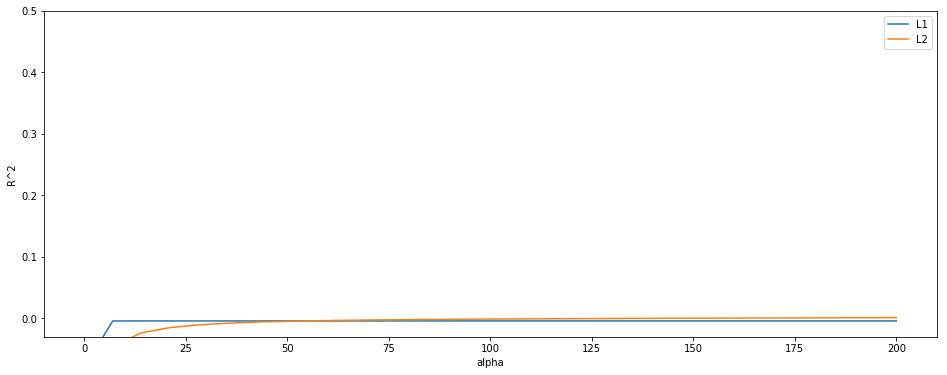

In [66]:
plt.figure(figsize=(16,6))
plt.plot(gridopt1.param_alpha,gridopt1.mean_test_score,label='L1')
plt.plot(gridopt2.param_alpha,gridopt2.mean_test_score,label='L2')
plt.ylim(-0.03, 0.5)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

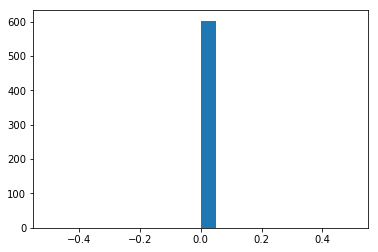

In [67]:
plt.hist(best_l1_coef, bins=20);

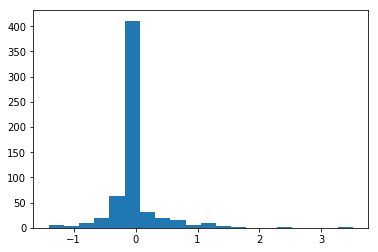

In [68]:
plt.hist(best_l2_coef, bins=20);

 Метрики для тестовой выборки:

In [69]:
alphaopt_l1.score(X_ktrain, y_ktrain)

0.0

In [70]:
alphaopt_l2.score(X_ktrain, y_ktrain)

0.041460626243660759

In [71]:
sklearn.metrics.mean_squared_error(y_ktrain, alphaopt_l1.predict(X_ktrain))

925.11197500000014

In [72]:
sklearn.metrics.mean_squared_error(y_ktrain, alphaopt_l2.predict(X_ktrain))

886.75625317099025

Метрики для контрольной выборки:

In [73]:
alphaopt_l1.score(X_test, y_test)

-0.00035842138216501951

In [74]:
alphaopt_l2.score(X_test, y_test)

0.0239723859264378

In [75]:
sklearn.metrics.mean_squared_error(y_test, alphaopt_l1.predict(X_test))

1290.554026577121

In [76]:
sklearn.metrics.mean_squared_error(y_test, alphaopt_l2.predict(X_test))

1259.1650557134533

### Вывод
С регуляризацией нет такого сильного разброса коэффициентов, чем без нее, этого и следовало ожидать. Значение R2 для L2 выше, чем для L1, как для тестовой, так и для контрольной выборок. Дисперсия ниже с L2, чем с L1.
Частично удалось решить проблемы обычного метода наименьших квадратов, но R2 статистики настолько низкие, что не понятно лучше стало или хуже.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [77]:
X_train[str(X_train.shape[1])]  = np.ones((len(X_train), 1))

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
X_test[str(X_test.shape[1])]  = np.ones((len(X_test), 1))

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [79]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return w.dot(X.T)

In [80]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    mspe = 1/len(X) * (np.linalg.norm(1 - np.divide(w.dot(X.T), y),ord = 2)) ** 2
    return mspe

In [81]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    Z = np.divide(X.T, y).T
    ones = np.ones(X.shape[0])
    grad = 2/len(X) * ((Z.T.dot(Z)).dot(w) - Z.T.dot(ones)) 
    return grad

In [82]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    mspe = 1/len(X) * (np.linalg.norm(1 - np.divide(w.dot(X.T), y),ord = 2)) ** 2 + np.linalg.norm(w, ord = 2) 
    return mspe

In [83]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    Z = np.divide(X.T, y).T
    ones = np.ones(X.shape[0])
    grad = 2/len(X) * ((Z.T.dot(Z)).dot(w.T) - Z.T.dot(ones)) + (4 * np.linalg.norm(w, ord = 2) * w).T
    return grad

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [84]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    cost_prev = 1
    coefs = []
    func = []
    nums = []
    w = w0
    delta = 100
    i = 0
    if is_reg == False:
        while (delta > eps) & (i < max_iter):
        
            #считаем значение функции потерь
            cost = get_func(w, X, y)
            func.append(cost)
        
            delta = abs(cost_prev - cost)
            cost_prev = cost
        
            #считаем градиент
            grad = get_grad(w, X, y)
        
            #обновляем коэффициенты
            w = w - step_size * grad.T
        
            i += 1
            nums.append(i)
           
    if is_reg == True:
        while (delta > eps) & (i < max_iter):
        
            #считаем значение функции потерь
            cost = get_reg_func(w, X, y)
            func.append(cost)
        
            delta = abs(cost_prev - cost)
            cost_prev = cost
        
            #считаем градиент
            grad = get_reg_grad(w, X, y)
        
            #обновляем коэффициенты
            w = w - step_size * grad.T
        
            i += 1
            nums.append(i)
    
    return w, func, nums   

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [85]:
w1, func1, nums1 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.zeros(X_train.shape[1]), step_size = 0.001, 
             max_iter = 10000, eps = 0.01, is_reg = False)

In [86]:
w2, func2, nums2 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.zeros(X_train.shape[1]), step_size = 1, 
             max_iter = 10000, eps = 0.01, is_reg = False)

In [87]:
w3, func3, nums3 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.zeros(X_train.shape[1]), step_size = 10, 
             max_iter = 10000, eps = 0.01, is_reg = False)

In [88]:
nums1,nums2,nums3

([1], [1], [1])

In [89]:
X_train.shape

(44382, 604)

С нулями ничего не получается, так как происходит всего одна итерация. Пробуем со случайным ветором весов:

In [90]:
w1, func1, nums1 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.random.rand(X_train.shape[1]), step_size = 0.001, 
             max_iter = 10000, eps = 0.01, is_reg = False)

In [91]:
w2, func2, nums2 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.random.rand(X_train.shape[1]), step_size = 1, 
             max_iter = 10000, eps = 0.01, is_reg = False)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [93]:
w3, func3, nums3 = grad_descent(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.random.rand(X_train.shape[1]), step_size = 10, 
             max_iter = 10000, eps = 0.01, is_reg = False)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


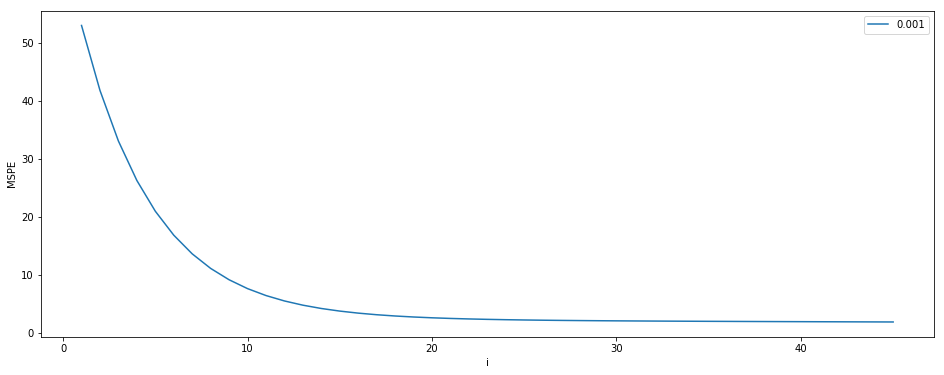

In [94]:
plt.figure(figsize=(16,6))

plt.plot(nums1,func1,label='0.001')
#plt.plot(nums2,func2,label='1')
#plt.plot(nums3,func3,label='10')

#plt.xlim(-10,80)
#plt.ylim(0,5)
plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

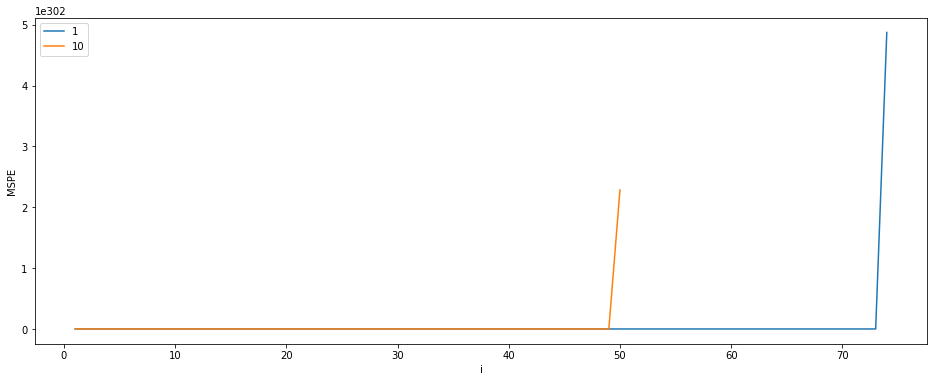

In [95]:
plt.figure(figsize=(16,6))

plt.plot(nums2,func2,label='1')
plt.plot(nums3,func3,label='10')

plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

По графикам видно, что с маленьким шагом метод сходится, а с большим расходится.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [96]:
w1, func1, nums1 = grad_descent(X = np.array(X_ktrain), y = np.array(y_ktrain), 
             w0 = np.random.rand(X_ktrain.shape[1]), step_size = 0.001, 
             max_iter = 10000, eps = 0.01, is_reg = True)

In [97]:
w2, func2, nums2 = grad_descent(X = np.array(X_ktrain), y = np.array(y_ktrain), 
             w0 = np.random.rand(X_ktrain.shape[1]), step_size = 1, 
             max_iter = 10000, eps = 0.01, is_reg = True)

In [98]:
w3, func3, nums3 = grad_descent(X = np.array(X_ktrain), y = np.array(y_ktrain), 
             w0 = np.random.rand(X_ktrain.shape[1]), step_size = 10, 
             max_iter = 10000, eps = 0.01, is_reg = True)

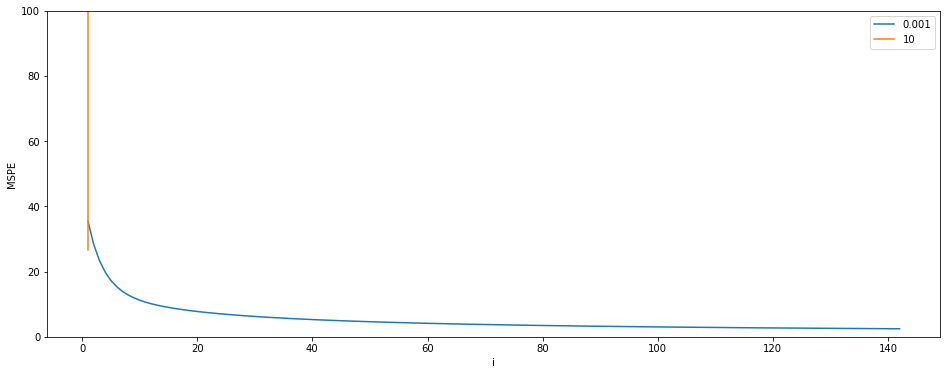

In [99]:
plt.figure(figsize=(16,6))

plt.plot(nums1,func1,label='0.001')
#plt.plot(nums2,func2,label='1')
plt.plot(nums3,func3,label='10')

plt.ylim(0,100)
plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/matplotlib/transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


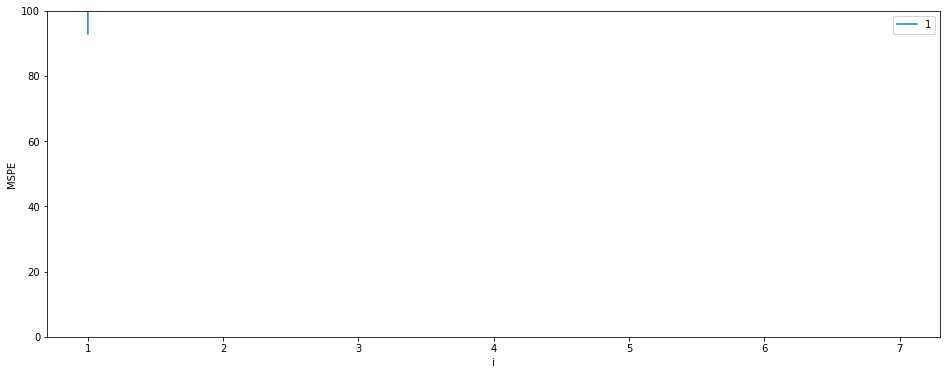

In [100]:
plt.figure(figsize=(16,6))

plt.plot(nums2,func2,label='1')

plt.ylim(0,100)
plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

### С регуляризацией сходится медленнее. Скорее всего это происходит потому что нужно сделать больше итераций для того, чтобы у оптимальных весов в модели был не такой сильный разброс как в случае без регуляризации.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

### Мои действия
Для того, чтобы осуществить стохастический градиентный спуск, воспользуемся функцией shuffle из sklearn.utils:

In [101]:
from sklearn.utils import shuffle

Из-за особенностей numpy нужно немного изменить функции нахождения градиента. Поэтому поменяем скалярное произведение на обычные умножение:

In [102]:
# возвращает градиент функционала MSPE для выборки (X[j], y[j]) и вектора весов w
def get_sgd_grad(w, X, y):
    Z = np.divide(X.T, y).T
    ones = np.ones(X.shape[0])
    grad = 2/len(X) * ((Z.T.dot(Z)*w) - Z.T.dot(ones)) # тут поменял
 
    return grad

In [103]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X[j], y[j]) и вектора весов w
def get_reg_sgd_grad(w, X, y):
    Z = np.divide(X.T, y).T
    ones = np.ones(X.shape[0])
    grad = 2/len(X) * ((Z.T.dot(Z)*w) - Z.T.dot(ones)) + (4 * np.linalg.norm(w, ord = 2) * w).T # тут тоже поменял
    return grad

In [104]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg):
    cost_prev = get_func(w0, X, y)
    coefs = []
    func = []
    nums = []
    w = w0
    delta = 1
    i = 0
    n = y.shape[0]
    if is_reg == False:
        while (delta > eps) & (i < max_iter):
                    
            #каждую итерацию будем перемещивать выборку, чтобы вычислять градиент по случайному объекту
            X, y = shuffle(X, y, random_state = 10)

            for j in range(n):
                            
                #считаем значение функции потерь
                cost = get_func(w, X, y)
                func.append(cost)
            
            
                delta = abs(cost_prev - cost)
                cost_prev = cost
            
                #считаем градиент
                grad = get_sgd_grad(w, X[j], y[j])
            
                #обновляем коэффициенты
                w = w - step_size * grad.T
                
                i += 1
                nums.append(i)
               
    if is_reg == True:
        while (delta > eps) & (i < max_iter):
                                
            #каждую итерацию будем перемещивать выборку, чтобы вычислять градиент по случайному объекту
            X_sh, y_sh = shuffle(X, y, random_state = 10)
            
            for j in range(n):

                #считаем значение функции потерь
                cost = get_reg_func(w, X, y)
                func.append(cost)
            
                delta = abs(cost_prev - cost)
                cost_prev = cost
            
                #считаем градиент
                grad = get_reg_sgd_grad(w, X[j], y[j])
            
                #обновляем коэффициенты
                w = w - step_size * grad.T
                            
                i += 1
                nums.append(i)
        
    return w, func, nums   

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

Без регуляризации:

In [ ]:
w1, func1, nums1 = sgd(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.random.rand(X_train.shape[1]), step_size = 0.001, 
             max_iter = 10000, eps = 0.001, is_reg = False)

In [ ]:
w2, func2, nums2 = sgd(X = np.array(X_train), y = np.array(y_train), 
             w0 = np.random.rand(X_train.shape[1]), step_size = 0.01, 
             max_iter = 10000, eps = 0.001, is_reg = False)

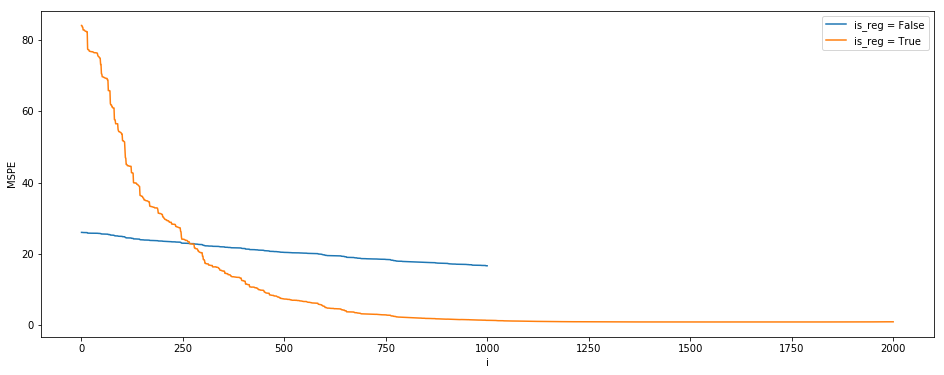

In [107]:
plt.figure(figsize=(16,6))

plt.plot(nums1,func1,label='is_reg = False',)
plt.plot(nums2,func2,label='is_reg = True',)

plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

Метрики контрольной выборки в модели без регуляризации с шагом поменьше:

In [108]:
get_reg_func(w1, X_test, y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [102]:
sklearn.metrics.mean_squared_error(y_pred=w1.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [103]:
sklearn.metrics.r2_score(y_pred=w1.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

Метрики контрольной выборки в модели без регуляризации с шагом побольше:

In [104]:
get_reg_func(w2, X_test, y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [105]:
sklearn.metrics.mean_squared_error(y_pred=w2.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [106]:
sklearn.metrics.r2_score(y_pred=w2.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

Теперь с регуляризацией:

In [107]:
w3, func3, nums3 = sgd(X = np.array(X_ktrain), y = np.array(y_ktrain), 
             w0 = np.random.rand(X_ktrain.shape[1]), step_size = 0.001, 
             max_iter = 10000, eps = 0.001, is_reg = True)

In [108]:
w4, func4, nums4 = sgd(X = np.array(X_ktrain), y = np.array(y_ktrain), 
             w0 = np.random.rand(X_ktrain.shape[1]), step_size = 0.01, 
             max_iter = 10000, eps = 0.001, is_reg = True)

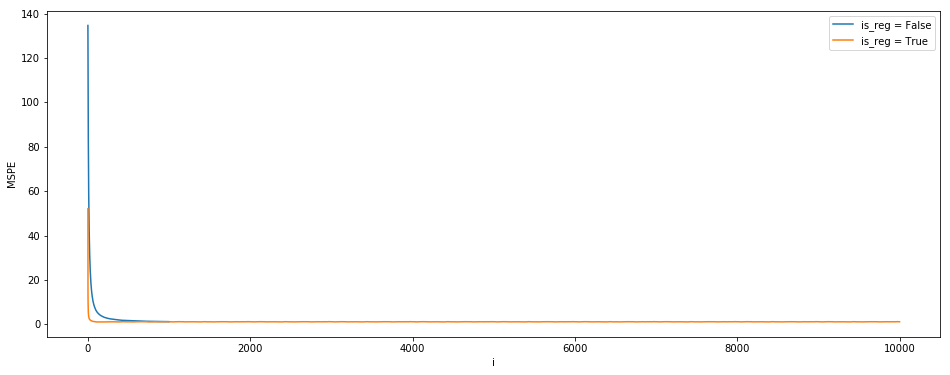

In [109]:
plt.figure(figsize=(16,6))

plt.plot(nums3,func3,label='is_reg = False',)
plt.plot(nums4,func4,label='is_reg = True',)

plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

Метрики контрольной выборки в модели с регуляризацией с шагом поменьше:

In [110]:
get_reg_func(w3, X_test, y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [ ]:
sklearn.metrics.mean_squared_error(y_pred=w3.dot(X_test.T), y_true=y_test)

In [111]:
sklearn.metrics.r2_score(y_pred=w3.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

Метрики контрольной выборки в модели с регуляризацией с шагом побольше:

In [112]:
get_reg_func(w4, X_test, y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [113]:
sklearn.metrics.mean_squared_error(y_pred=w4.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

In [114]:
sklearn.metrics.r2_score(y_pred=w4.dot(X_test.T), y_true=y_test)

ValueError: shapes (603,) and (604,19022) not aligned: 603 (dim 0) != 604 (dim 0)

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

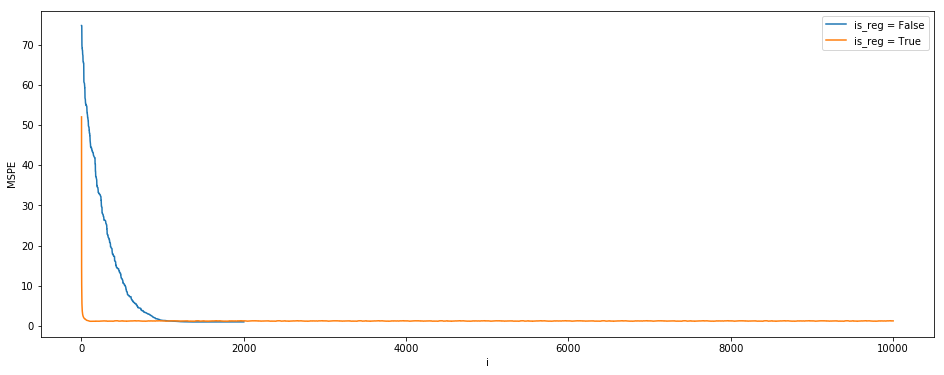

In [115]:
plt.figure(figsize=(16,6))

plt.plot(nums2,func2,label='is_reg = False',)
plt.plot(nums4,func4,label='is_reg = True',)

plt.xlabel('i')
plt.ylabel('MSPE')
plt.legend()

Регуляризация является дополнительным условием налагаемым на целевую функцию, поэтому наиболее вероятно, что для того, чтобы подобрать оптимальные веса в модели с регуляризацией, нужно сделать больше итераций.

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

Мы уже обучили такую модель в 12 пункте, поэтому нужно просто вывести MSPE для полученных весов и контрольной выборки:

In [102]:
get_func(reg_coef, X_test, y_test)

2.7425293587005288e+22

# Просьба
Мария, буду очень Вам благодарен, если Вы напишите, почему у меня такой низкий r2 независимо от того, каким методом я регрессировал данные. Так и не разобрался в этом.